In [13]:
import pandas as pd
spaza_data = pd.read_csv('spaza_shop_data.csv')

In [12]:
import os
print(os.getcwd())

C:\Users\USER\M.L  Activity 10


In [14]:
sample_data = spaza_data.sample(frac=0.1, random_state=42)

In [15]:
sample_data = spaza_data.sample(n=100, random_state=42)

In [16]:
sample_data = spaza_data.head(5)

In [17]:
sample_data = spaza_data.tail(5)

In [20]:
print(sample_data)



          Date          Item  Sales  Inventory Level  Seasonal Trend  \
495 2024-09-06   Cooking Oil     11               42               0   
496 2024-09-06    Maize Meal     51               17               5   
497 2024-09-06  Toilet Paper     14               70               0   
498 2024-09-06      Tomatoes     10               48               0   
499 2024-09-06      Potatoes     15               48               0   

     Event Impact  
495             0  
496             0  
497             0  
498             0  
499             0  


In [21]:
spaza_data.isnull().sum()

Date               0
Item               0
Sales              0
Inventory Level    0
Seasonal Trend     0
Event Impact       0
dtype: int64

In [22]:
spaza_data.duplicated().sum()

0

In [23]:
spaza_data['Date'] = pd.to_datetime(spaza_data['Date'])

In [24]:
grouped_data = spaza_data.groupby('Date').agg({
    'Sales': 'sum',
    'Inventory Level': 'sum',
    'Seasonal Trend': 'mean',
    'Event Impact': 'mean'
}).reset_index()

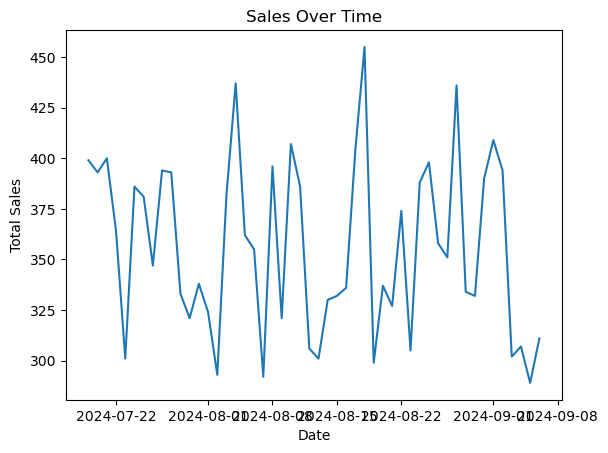

In [25]:
import matplotlib.pyplot as plt

plt.plot(grouped_data['Date'], grouped_data['Sales'])
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Sales Over Time')
plt.show()

In [26]:
pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/13.3 MB 1.3 MB/s eta 0:00:10
   ---------------------------------------- 0.1/13.3 MB 1.3 MB/s eta 0:00:10
   ---------------------------------------- 0.1/13.3 MB 655.4 kB/s eta 0:00:21
   ---------------------------------------- 0.1/13.3 MB 590.8 kB/s eta 0:00:23
   ---------------------------------------- 0.1/13.3 MB 590.8 kB/s eta 0:00:23
   ---------------------------------------- 0.2/13.3 MB 573.4 kB/s eta 0:00:23
   ---------------------------------------- 0.2/13.3 MB 573.4 kB/s eta 0:00:23
    --------------------------------------- 0.2/13.3 MB 599.0 kB/s eta 0:00:22
    --------------------------------------- 0.2/13.3 MB 577.6 kB/s eta 0:00:23
    --------------------------------------- 0.3/13.3 MB 542.5 kB/s eta 0:00:25
    --------------------------------------- 0.3/13.3 MB 542.5 kB/s eta 0:0

10:44:25 - cmdstanpy - INFO - Chain [1] start processing
10:44:26 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\USER\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\USER\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


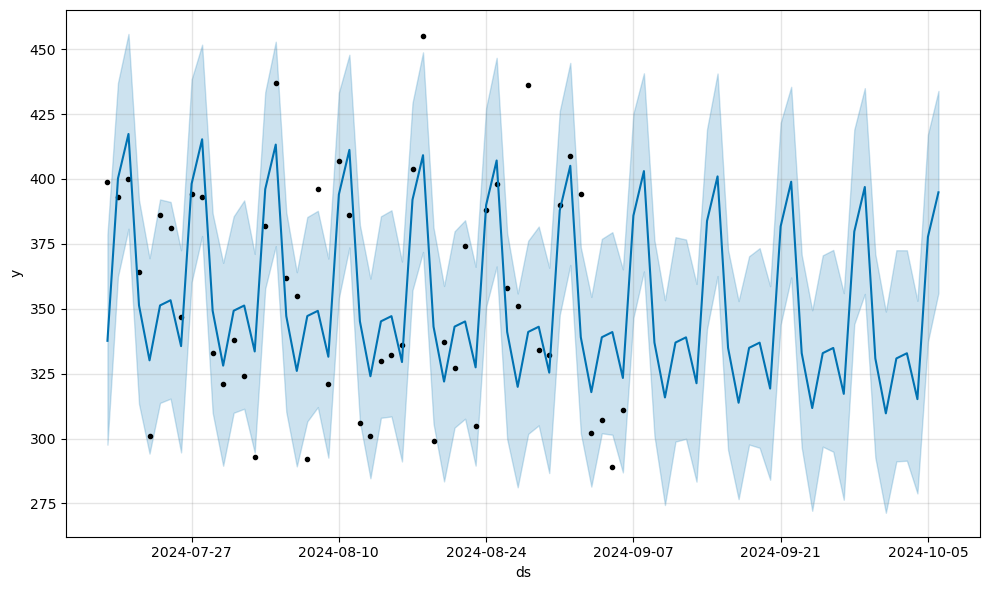

In [29]:
from prophet import Prophet


prophet_data = grouped_data[['Date', 'Sales']].rename(columns={'Date': 'ds', 'Sales': 'y'})


model = Prophet()
model.fit(prophet_data)


future = model.make_future_dataframe(periods=30)  
forecast = model.predict(future)


model.plot(forecast)
plt.show()


In [30]:
pip install statsmodels


C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


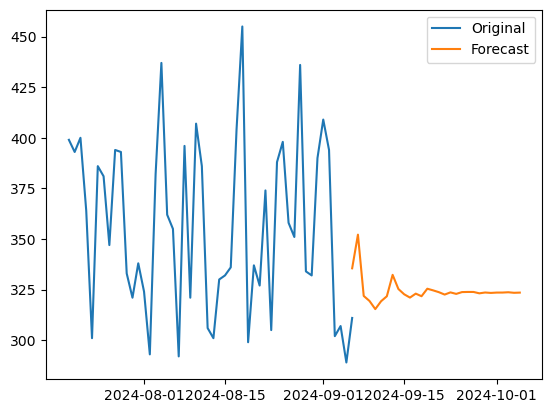

In [31]:
from statsmodels.tsa.arima.model import ARIMA

sales_data = grouped_data.set_index('Date')['Sales']

model = ARIMA(sales_data, order=(5, 1, 0))  
model_fit = model.fit()

forecast = model_fit.forecast(steps=30)

plt.plot(sales_data.index, sales_data, label='Original')
plt.plot(pd.date_range(sales_data.index[-1], periods=30, freq='D'), forecast, label='Forecast')
plt.legend()
plt.show()


In [36]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [39]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(grouped_data['Sales'].values.reshape(-1, 1))

# Prepare the training data (using a window of 60 days)
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile and fit the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, batch_size=1, epochs=1)

# Make predictions (scale the data back afterward)
predictions = model.predict(X)
predictions = scaler.inverse_transform(predictions)

# Plot the results
plt.plot(grouped_data['Date'], grouped_data['Sales'], label='Original')
plt.plot(grouped_data['Date'][-len(predictions):], predictions, label='LSTM Forecast')
plt.legend()
plt.show()



IndexError: tuple index out of range

In [40]:
print(X.shape)



(0,)


In [44]:
X, y = create_dataset(scaled_data, time_step=30)


In [46]:
if X.shape[0] > 0:
    X = X.reshape(X.shape[0], X.shape[1], 1)
else:
    print("Not enough data to reshape!")


In [47]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(grouped_data['Sales'].values.reshape(-1, 1))

# Prepare the training data (using a window of 60 days)
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Adjust time_step if necessary
X, y = create_dataset(scaled_data, time_step=30)

# Check the shape of X before reshaping
print(f"Shape of X before reshaping: {X.shape}")

# Ensure there is enough data for reshaping
if X.shape[0] > 0:
    X = X.reshape(X.shape[0], X.shape[1], 1)
else:
    print("Not enough data to reshape!")

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile and fit the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, batch_size=1, epochs=1)

# Make predictions (scale the data back afterward)
predictions = model.predict(X)
predictions = scaler.inverse_transform(predictions)

# Plot the results
plt.plot(grouped_data['Date'], grouped_data['Sales'], label='Original')
plt.plot(grouped_data['Date'][-len(predictions):], predictions, label='LSTM Forecast')
plt.legend()
plt.show()


Shape of X before reshaping: (19, 30)


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.2009
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step


In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Example: Calculate MAE for ARIMA
mae_arima = mean_absolute_error(sales_data[-30:], forecast)
print("MAE for ARIMA:", mae_arima)


MAE for ARIMA: 41.84991967245378


In [50]:
mse_arima = mean_squared_error(sales_data[-30:], forecast)
print("MSE for ARIMA:", mse_arima)


MSE for ARIMA: 2947.141233929585


## Insights and Recommendations:

### Up Before Peaks: 
Utilize forecasts from Prophet and LSTM to anticipate high-demand periods and stock up accordingly. Plan inventory increases before these peaks to avoid stockouts.

### Adjust Pricing:
Implement dynamic or adaptive pricing strategies based on forecasted demand trends from all models. Increase prices during predicted high-demand periods and consider discounts during anticipated low-demand phases.

### Target Promotions: 
Align promotional efforts with forecasted sales trends. Use insights from Prophet and LSTM to launch targeted promotions around expected high-sales periods and special events.

### Monitor and Adjust:
Continuously monitor actual sales against forecasts and adjust strategies as needed. Use the most accurate model (based on MAE and other performance metrics) to guide your ongoing stock and pricing decisions.
